## 2-3 量子フーリエ変換

この節では、量子アルゴリズムの中でも最も重要なアルゴリズムの一つである量子フーリエ変換について学ぶ。    
量子フーリエ変換はその名の通りフーリエ変換を行う量子アルゴリズムであり、様々な量子アルゴリズムのサブルーチンとしても用いられることが多い。   
(参照：Nielsen-Chuang 5.1 `The quantum Fourier transform`)

※なお、最後のコラムでも多少述べるが、回路が少し複雑である・入力状態を用意することが難しいといった理由から、いわゆるNISQデバイスでの量子フーリエ変換の実行は難しいと考えられている。  

### 定義
まず、$2^n$成分の配列 $\{x_j\}$ に対して$(j=1,\cdots,2^n)$、その[離散フーリエ変換](https://ja.wikipedia.org/wiki/離散フーリエ変換)である配列$\{ y_k \}$を
$$
y_k = \frac{1}{\sqrt{2^n}} \sum_{j=1}^{2^n} x_j e^{i\frac{2\pi kj}{2^n}}   \tag{1}
$$
で定義する$(k=1, \cdots 2^n)$。配列 $\{x_j\}$ は$\sum_{j=1}^{2^n} |x_j|^2 = 1$ と規格化されているものとする。


量子フーリエ変換アルゴリズムは、入力の量子状態
$$
|x\rangle := \sum_{j=1}^{2^n} x_j |j\rangle
$$
を、
$$
|y \rangle := \sum_{k=1}^{2^n} y_k |k\rangle  \tag{2}
$$
となるように変換する量子アルゴリズムである。ここで、$|i \rangle$は、整数$i$の二進数での表示$i_1 \cdots i_n$ ($i_m = 0,1$)に対応する量子状態$|i_1 \cdots i_n \rangle$の略記である。（例えば、$ |2 \rangle = |0\cdots0 10 \rangle, |7 \rangle = |0\cdots0111 \rangle$となる) 

ここで、式(1)を(2)に代入してみると、
$$
 |y \rangle = \frac{1}{\sqrt{2^n}} \sum_{k=1}^{2^n} \sum_{j=1}^{2^n} x_j e^{i\frac{2\pi kj}{2^n}} |k\rangle
             = \sum_{j=1}^{2^n} x_j \left( \frac{1}{\sqrt{2^n}} \sum_{k=1}^{2^n}  e^{i\frac{2\pi kj}{2^n}} |k\rangle \right)
$$
となる。よって、量子フーリエ変換では、
$$
 |j\rangle \to \frac{1}{\sqrt{2^n}} \sum_{k=1}^{2^n}  e^{i\frac{2\pi kj}{2^n}} |k\rangle
$$
を行う量子回路(変換)$U$を見つければ良いことになる。（余裕のある読者は、これがユニタリ変換であることを実際に計算して確かめてみよう）   
この式はさらに式変形できて（やや複雑なので最後の結果だけ見てもよい）
$$
\begin{eqnarray}
  \sum_{k=1}^{2^n} e^{i\frac{2\pi kj}{2^n}} |k\rangle 
 &=& \sum_{k_1=0}^1 \cdots \sum_{k_n=0}^1  e^{i\frac{2\pi (k_1 2^{n-1} + \cdots k_n 2^0 )\cdot j}{2^n}} |k_1 \cdots k_n\rangle \:\:\:\: \text{(kの和を2進数表示で書き直した)} \\
 &=& \sum_{k_1=0}^1 \cdots \sum_{k_n=0}^1  e^{i 2\pi j (k_1 2^{-1} + \cdots k_n 2^{-n})} |k_1 \cdots k_n\rangle \\
 &=& \left( \sum_{k_1=0}^1 e^{i 2\pi j k_1 2^{-1}} |k_1 \rangle \right) \otimes \cdots  \otimes \left( \sum_{k_n=0}^1 e^{i 2\pi j k_n 2^{-n}} |k_n \rangle \right) \:\:\:\: \text{("因数分解"をして、全体をテンソル積で書き直した)} \\
 &=& \left( |0\rangle +  e^{i 2\pi 0.j_n} |1 \rangle \right) \otimes \left( |0\rangle +  e^{i 2\pi 0.j_{n-1}j_n} |1 \rangle \right) \otimes \cdots \otimes \left( |0\rangle +  e^{i 2\pi 0.j_1j_2\cdots j_n} |1 \rangle \right) \:\:\:\: \text{(カッコの中の和を計算した)}
\end{eqnarray}
$$
となる。ここで、   
$$
0.j_l\cdots j_n = \frac{j_l}{2} + \frac{j_{l-1}}{2^2} + \cdots + \frac{j_n}{2^{n-l+1}} 
$$
は二進小数であり、$e^{i 2\pi j/2^{-l} } = e^{i 2\pi j_1 \cdots j_l . j_{l-1}\cdots j_n }
= e^{i 2\pi 0. j_{l-1}\cdots j_n }$となることを用いた。（$e^{i2\pi}=1$なので、整数部分は関係ない）


まとめると、量子フーリエ変換では、
$$
 |j\rangle = |j_1 \cdots j_n \rangle \to \frac{ \left( |0\rangle +  e^{i 2\pi 0.j_n} |1 \rangle \right) \otimes \left( |0\rangle +  e^{i 2\pi 0.j_{n-1}j_n} |1 \rangle \right) \otimes \cdots \otimes \left( |0\rangle +  e^{i 2\pi 0.j_1j_2\cdots j_n} |1 \rangle \right)  }{\sqrt{2^n}}
 \tag{*}
$$
という変換ができればよい。

### 回路の構成
それでは、量子フーリエ変換を実行する回路を実際にどのように構成するかを見ていこう。   
そのために、次のアダマールゲート$H$についての等式（計算すると合っていることが分かる）
$$
 |m \rangle = \frac{|0\rangle + e^{i 2\pi 0.m}|1\rangle }{\sqrt{2}}  \:\:\: (m=0,1)
$$
と、角度 $2\pi/2^l$ の一般位相ゲート
$$
 R_l =
 \begin{pmatrix} 1 & 0\\ 0 & e^{i \frac{2\pi}{2^l} } \end{pmatrix}
$$
を多用する。

1. まず、状態$\left( |0\rangle +  e^{i 2\pi 0.j_1j_2\cdots j_n} |1\rangle \right)$の部分をつくる。1番目の量子ビット$|j_1\rangle$にアダマールゲートをかけると
$$
 |j_1 \cdots j_n \rangle \to \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1} |1\rangle \right) |j_2 \cdots j_n \rangle
$$
となるが、ここで、2番目のビット$|j_2\rangle$を制御ビットとする一般位相ゲート$R_2$を1番目の量子ビットにかけると、$j_2=0$の時は何もせず、$j_2=1$の時のみ1番目の量子ビットの$|1\rangle$部分に位相 $2\pi/2^2 = 0.01$（二進小数）がつくから、
$$
     \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1} |1\rangle \right) |j_2 \cdots j_n \rangle
 \to \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1j_2} |1\rangle \right) |j_2 \cdots j_n \rangle
$$
となる。以下、$l$番目の量子ビット$|j_l\rangle$を制御ビットとする一般位相ゲート$R_l$をかければ（$l=3,\cdots n$）、最終的に
$$
     \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1\cdots j_n} \right) |j_2 \cdots j_n \rangle
$$
が得られる。

2. 次に、状態$\left( |0\rangle + e^{i2\pi 0.j_{n-1} j_n} |1\rangle\right)$の部分をつくる。先ほどと同様に、2番目のビット$|j_2\rangle$にアダマールゲートをかければ
$$
     \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1\cdots j_n} \right) \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_2} \right) |j_3 \cdots j_n \rangle
$$
ができる。再び、3番目の量子ビットを制御ビット$|j_3\rangle$とする位相ゲート$R_2$をかければ
$$
     \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1\cdots j_n} \right) \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_2j_3} \right) |j_3 \cdots j_n \rangle
$$
となり、これを繰り返して
$$
     \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1\cdots j_n} \right) \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_2\cdots j_n} \right) |j_3 \cdots j_n \rangle
$$
を得る。

3. 1,2と同様の手順で、$l$番目の量子ビット$|j_l\rangle$にアダマールゲート・制御位相ゲート$R_l$をかけていく($l=3,\cdots,n$)。すると最終的に
$$
 |j_1 \cdots j_n \rangle \to \left( \frac{|0\rangle +  e^{i 2\pi 0.j_1\cdots j_n} |1 \rangle}{\sqrt{2}} \right) \otimes \cdots \otimes
 \left( \frac{|0\rangle +  e^{i 2\pi 0.j_{n-1}j_n} |1 \rangle}{\sqrt{2}} \right)  \otimes
 \left( \frac{|0\rangle +  e^{i 2\pi 0.j_n} |1 \rangle}{\sqrt{2}} \right)  
$$
が得られるので、最後にビットの順番をSWAPゲートで反転させてあげれば、量子フーリエ変換を実行する回路が構成できたことになる（式($*$)とはビットの順番が逆になっていることに注意）。   
SWAPを除いた部分を回路図で書くと以下のようである。
![QFT](figs/2/QFT.png)

### SymPyを用いた実装
量子フーリエ変換への理解を深めるために、SymPyを用いて$n=3$の場合の回路を実装してみよう。

In [4]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # ベクトルや行列を綺麗に表示するため
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP,CPHASE,CGateS

In [2]:
# Google Colaboratory上でのみ実行してください
from IPython.display import HTML
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax) {
            window.MathJax = {
                'tex2jax': {
                    'inlineMath': [['$', '$'], ['\\(', '\\)']],
                    'displayMath': [['$$', '$$'], ['\\[', '\\]']],
                    'processEscapes': true,
                    'processEnvironments': true,
                    'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
                    'displayAlign': 'center',
                },
                'HTML-CSS': {
                    'styles': {'.MathJax_Display': {'margin': 0}},
                    'linebreaks': {'automatic': true},
                    // Disable to prevent OTF font loading, which aren't part of our
                    // distribution.
                    'imageFont': null,
                },
               'messageStyle': 'none'
            };
            var script = document.createElement("script");
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe";
            document.head.appendChild(script);
        }
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

まず、フーリエ変換される入力$|x\rangle$として、
$$
 |x\rangle =  \sum_{j=1}^8 \frac{1}{\sqrt{8}} |i\rangle
$$
という全ての状態の重ね合わせ状態を考える（$x_1 = \cdots = x_8 = 1/\sqrt{8}$）。

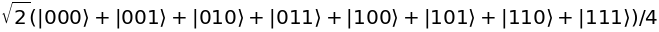

In [34]:
input = 1/sqrt(8) *( Qubit("000")+Qubit("001")+Qubit("010")+Qubit("011")+Qubit("100")+Qubit("101")+Qubit("110")+Qubit("111")) 
input

この状態に対応する配列をnumpyでフーリエ変換すると

In [21]:
import numpy as np
input_np_array = 1/np.sqrt(8)*np.ones(8) 
print( input_np_array ) ## 入力
print( np.fft.ifft(input_np_array) * np.sqrt(8) ) ## 出力.  ここでのフーリエ変換の定義とnumpyのifftの定義を合わせるため、sqrt(2^3)をかける

[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


となり、フーリエ変換すると $y_1=1,y_2=\cdots=y_8=0$ という簡単な配列になることが分かる。これを量子フーリエ変換で確かめてみよう。

まず、$R_1, R_2, R_3$ゲートはそれぞれ$Z, S, T$ゲートに等しいことに注意する（$e^{i\pi}=-1, e^{i\pi/2}=i$）。

In [27]:
represent(Z(0),nqubits=1), represent(S(0),nqubits=1), represent(T(0),nqubits=1) 

⎛                 ⎡1   0  ⎤⎞
⎜                 ⎢       ⎥⎟
⎜⎡1  0 ⎤  ⎡1  0⎤  ⎢    ⅈ⋅π⎥⎟
⎜⎢     ⎥, ⎢    ⎥, ⎢    ───⎥⎟
⎜⎣0  -1⎦  ⎣0  ⅈ⎦  ⎢     4 ⎥⎟
⎝                 ⎣0  ℯ   ⎦⎠

量子フーリエ変換(Quantum Fourier TransformなのでQFTと略す)を実行回路を構成していく。   
最初に、1番目（SymPyは右から0,1,2とビットを数えるので、SymPyでは2番目）の量子ビットにアダマール演算子をかけ、2番目・3番目のビットを制御ビットとする$R_2, R_3$ゲートをかける。

In [35]:
QFT_gate = H(2)
QFT_gate = CGateS(1, S(2))  * QFT_gate
QFT_gate = CGateS(0, T(2))  * QFT_gate

2番目（SymPyでは1番目）の量子ビットにもアダマールゲートと制御$R_2$演算を施す。

In [36]:
QFT_gate = H(1)  * QFT_gate
QFT_gate = CGateS(0, S(1))  * QFT_gate

3番目（SymPyでは0番目）の量子ビットにはアダマールゲートのみをかければ良い。

In [37]:
QFT_gate = H(0)  * QFT_gate

最後に、ビットの順番を合わせるためにSWAPゲートをかける。

In [38]:
QFT_gate = SWAP(0, 2)  * QFT_gate

これで$n=3$の時の量子フーリエ変換の回路を構成できた。回路自体はやや複雑である。

In [39]:
QFT_gate

入力ベクトル$|x\rangle$ にこの回路を作用させると、以下のようになり、正しくフーリエ変換された状態が出力されていることが分かる。（$y_1=1,y_2=\cdots=y_8=0$）

In [40]:
simplify( qapply( QFT_gate * input) )

読者は是非、入力を様々に変えてこの回路を実行し、フーリエ変換が正しく行われていることを確認してみてほしい。

---
### コラム：計算量について
「量子コンピュータは計算を高速に行える」とは、どういうことだろうか。本節で学んだ量子フーリエ変換を例にとって考えてみる。

量子フーリエ変換を行うために必要なゲート操作の回数は、1番目の量子ビットに$n$回、2番目の量子ビットに$n-1$回、...、$n$番目の量子ビットに1回で合計$n(n-1)/2$回、そして最後のSWAP操作が約$n/2$回であるから、全て合わせると$\mathcal{O}(n^2)$回である（$\mathcal{O}$記法について詳しく知りたい人は、下記セクションを参照）。   
一方、古典コンピュータでフーリエ変換を行う[高速フーリエ変換](https://ja.wikipedia.org/wiki/高速フーリエ変換)は、同じ計算を行うのに$\mathcal{O}(n2^n)$の計算量を必要とする。この意味で、量子フーリエ変換は、古典コンピュータで行う高速フーリエ変換に比べて「高速」と言える。   
これは一見喜ばしいことに見えるが、落とし穴がある。フーリエ変換した結果$\{y_k\}$は量子フーリエ変換後の状態$|y\rangle$の確率振幅として埋め込まれているが、この振幅を素直に読み出そうとすると、結局は**指数関数的な回数の観測を繰り返さなくてはならない**。さらに、そもそも入力$|x\rangle$を用意する方法も簡単ではない（素直にやると、やはり指数関数的な時間がかかってしまう）。  
このように、量子コンピュータや量子アルゴリズムを「実用」するのは簡単ではなく、さまざまな工夫・技術発展がまだまだ求められている。

一体どのような問題で量子コンピュータが高速だと思われているのか、理論的にはどのように扱われているのかなど、詳しく学びたい方はこのQmediaの記事[「量子計算機が古典計算機より優れている」とはどういうことか](https://www.qmedia.jp/computational-complexity-and-quantum-computer/)(竹嵜智之)を参照されたい。

#### オーダー記法$\mathcal{O}$についての註
そもそも、アルゴリズムの性能はどのように定量評価できるのだろうか。ここでは、アルゴリズムの実行に必要な資源、主に時間をその基準として考える。とくに問題のサイズを$n$としたとき、計算ステップ数（時間）や消費メモリなど、必要な計算資源が$n$の関数としてどう振る舞うかを考える。（問題のサイズとは、例えばソートするデータの件数、あるいは素因数分解したい数の二進数表現の桁数などである。）

例えば、問題のサイズ$n$に対し、アルゴリズムの要求する計算資源が次の$f(n)$で与えられるとする。

$$ f(n) = 2n^2 + 5n + 8 $$

$n$が十分大きいとき（例えば$n=10^{10}$）、$2n^2$に比べて$5n$や$6$は十分に小さい。したがって、このアルゴリズムの評価という観点では$5n+8$という因子は重要ではない。また、$n^2$の係数が$2$であるという情報も、$n$が十分大きいときの振る舞いには影響を与えない。こうして、計算時間$f(n)$の一番**「強い」**項の情報が重要であると考えることができる。このような考え方を漸近的評価といい、計算量のオーダー記法では次の式で表す。

$$f(n) = \mathcal{O}(n^2)$$

一般に$f(n) = \mathcal{O}(g(n))$とは、ある正の数$n_0, c$が存在して、任意の$n > n_0$に対して

$$|f(n)| \leq c |g(n)|$$

が成り立つことである。上の例では、$n_0=7, c=3$とすればこの定義の通りである（グラフを描画してみよ）。練習として、$f(n) = 6n^3 +5n$のオーダー記法$f(n) = \mathcal{O}(n^3)$を与える$n_0, c$の組を考えてみよ。

アルゴリズムの性能評価では、その入力のサイズを$n$としたときに必要な計算資源を$n$の関数として表す。特にオーダー記法による漸近評価は、入力のサイズが大きくなったときの振る舞いを把握するときに便利である。そして、こうした漸近評価に基づいた計算量理論というものを用いて、様々なアルゴリズムの分類が行われている。詳細は上記のQmedia記事を参照されたい。